# 04_Bootstrapping_and_main_ts

## 1. What happens when a NestJS app starts?

* When you start a NestJS application, **the very first file that runs is `main.ts`**.
* `main.ts` is the **entry point** of any NestJS application.
* From `main.ts`, NestJS **bootstraps (starts) all other components**:

  * Modules
  * Controllers
  * Providers (Services)

---

## 2. Inside `main.ts`

At the top of `main.ts` we usually have:

* Importing `NestFactory` from the Nest core package:

  * `import { NestFactory } from '@nestjs/core';`
  * `@nestjs/core` is the main Nest package, and `NestFactory` is a helper class from it.
* Importing the **root module** (usually `AppModule`):

  * `import { AppModule } from './app.module';`
  * `AppModule` is defined in `app.module.ts` inside the `src` folder.

Then we have the **bootstrap function**:

* `async function bootstrap() { ... }`
* Marked as `async` because it uses `await` when creating the application.

Inside `bootstrap()`:

* We call `NestFactory.create(AppModule)`

  * `NestFactory` provides a **`create()` method**.
  * We pass the **root module** (`AppModule`) to `create()`.
  * This returns an **instance of the Nest application** (commonly stored in a variable called `app`).
* This `app` object represents the **core NestJS application instance**.

So in short:

* `NestFactory.create(AppModule)`

  * Creates the NestJS app instance.
  * Makes the app **aware of the root module** (`AppModule`).

---

## 3. Role of the Root Module (`AppModule`)

* `AppModule` is the **root module** of the NestJS application.
* Defined in `app.module.ts`.
* It is decorated with the `@Module()` decorator.

Example structure in `app.module.ts`:

* `@Module({ controllers: [AppController], providers: [AppService], imports: [...] })`
* `@Module` decorator takes **metadata**:

  * `controllers`: array of controllers (e.g., `AppController`)
  * `providers`: array of providers/services (e.g., `AppService`)
  * `imports`: other modules we want to include

Because `main.ts` bootstraps `AppModule`:

* The NestJS app now **knows about**:

  * `AppController` (root controller)
  * `AppService` (root service / provider)
* In future, when we create **user-defined modules**, we must **import them into `AppModule`** inside the `imports` array so that:

  * The NestJS application becomes aware of those modules.
  * If we do **not** import them, the app **cannot use** those modules, their controllers, or their services.

Summary:

* `AppModule` = root module.
* It tells NestJS:

  * Which controllers exist.
  * Which services (providers) exist.
  * Which other modules (user-defined) are part of the app.

---

## 4. How Bootstrapping Works (Step-by-Step)

1. You start the NestJS app (e.g., `npm run start:dev`).
2. **`main.ts` executes first.**
3. In `main.ts`, NestJS calls `NestFactory.create(AppModule)`.
4. NestJS creates an instance of the application and makes it aware of `AppModule`.
5. Through `AppModule`, NestJS learns about:

   * Root controller (`AppController`)
   * Root service (`AppService`)
   * Any other modules imported into `AppModule`.
6. Those modules have their own controllers and providers, so:

   * NestJS also becomes aware of **all controllers and services** in those modules.

This entire process is called **bootstrapping** the NestJS application.

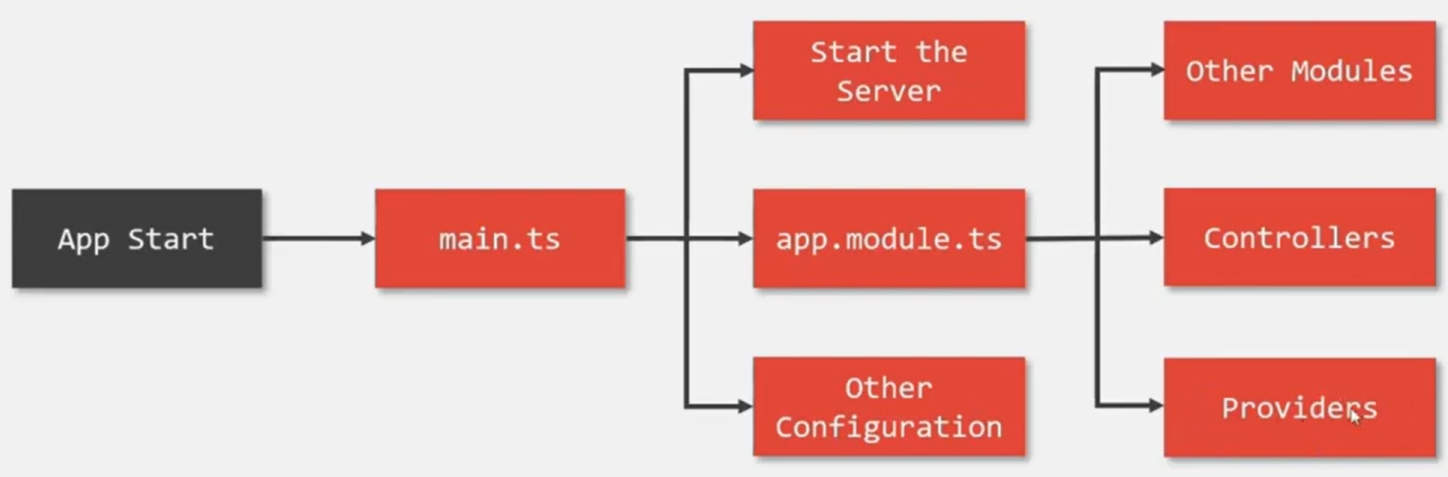


---

## 5. Listening on a Port – `app.listen()`

After creating the app instance, inside `bootstrap()` we typically have:

* `await app.listen(3000);`

What this does:

* Starts an **HTTP server**.
* Makes the NestJS application **available for incoming requests**.
* Here, the app listens for requests on **port `3000`**.

Example behavior:

* If the app is running on port `3000`:

  * You can open your browser at `http://localhost:3000`.
  * You will see a response (like `Hello World`) if everything is set up.
* If you change the port in `main.ts` to `3300` and restart/save:

  * The app will recompile (because it’s running in **watch mode**).
  * Now `http://localhost:3000` will give an error.
  * But `http://localhost:3300` will work and show the response.

So:

* `app.listen(portNumber)` = **where your Nest app runs**.

---

## 6. Controllers and Services (from the Root Module)

In `AppModule` we typically have:

* `controllers: [AppController]`
* `providers: [AppService]`

### 6.1 Controller (`AppController`)

* The controller file (e.g., `app.controller.ts`) contains **action methods**.
* These methods **handle incoming HTTP requests**.
* Example:

  * A method that handles a `GET` request on the **root URL** (`/`).
  * Decorated with something like `@Get()`.
* If a request:

  * Comes to the **root URL** (`/`).
  * Uses the **GET HTTP method**.
  * → Then that action method in `AppController` will handle the request.
* The method:

  * Receives the request.
  * Processes it.
  * Returns a response to the client (browser/Postman/etc.).

### 6.2 Service (`AppService`)

* The service file (e.g., `app.service.ts`) contains **business logic**.
* Example:

  * `getHello()` method that just returns a string like `'Hello from NestJS App'`.
* In `AppController`, we **inject** an instance of `AppService`.

  * This is done using **Dependency Injection** (NestJS does it for us).
  * In the constructor of `AppController`, we ask Nest to give us an `AppService` instance.
* The controller method calls `this.appService.getHello()` to get data.

Flow:

1. User sends GET request to `/`.
2. `AppController` method for GET `/` is called.
3. That method calls `AppService.getHello()`.
4. `getHello()` returns some text.
5. Controller returns that text as the HTTP response.

If you change the text returned by `getHello()` in `AppService` and save:

* The app recompiles.
* Refreshing the browser shows the **new text**.

---

## 7. What else can we configure in `main.ts`?

Right now, in the basic setup, we usually only see:

* Creating the app: `const app = await NestFactory.create(AppModule);`
* Listening on a port: `await app.listen(3000);`

But inside the `bootstrap()` function and using the `app` object, we can configure more things:

Examples of things we can configure:

* **Enable CORS**:

  * To allow requests from different origins (e.g., frontend on another domain/port).
* **Use middlewares**:

  * Custom logging, authentication checks, etc.
* **Set view engine**:

  * If building an app with server-side rendered templates.
* **Handle static files**:

  * E.g., serving images, CSS, JavaScript files from a `public` folder.

In short:

* `main.ts` is not just the entry point.
* It is also the place where we can **set global app-level configurations**.
* `app.listen()` at the end starts the HTTP server using those configurations.

---

## 8. The `app` Object

* When we log the `app` object using `console.log(app)` in `main.ts`:

  * We can see it has **many properties and methods**.
  * It is a **large, heavy object** representing the Nest application instance.
* We will use many of its methods in future lectures (e.g., enabling CORS, applying global pipes, filters, etc.).

Normally, we don’t keep the `console.log(app)` statement:

* It was just for understanding.
* After checking, we remove it and save again.

---

## 9. Final Recap – Bootstrapping Flow

### When the NestJS app starts:

1. **`main.ts` file executes first.**
2. Inside `main.ts`, we:

   * Use `NestFactory.create(AppModule)` to create the Nest application instance.
   * This makes the app aware of the **root module** (`AppModule`).
3. `AppModule` (root module):

   * Is defined in `app.module.ts`.
   * Decorated with `@Module({ ... })`.
   * Tells NestJS about:

     * The **root controller** (`AppController`).
     * The **root service / providers** (`AppService`).
     * Any **user-defined modules** imported in the `imports` array.
4. Because of this:

   * NestJS knows all controllers and services defined in `AppModule` and in any other imported modules.
5. In `main.ts` we call `app.listen(3000)`:

   * Starts the HTTP server.
   * Application now listens for incoming requests on port `3000` (or whatever port we specify).
6. Optionally, in `bootstrap()` using the `app` object, we can:

   * Enable CORS.
   * Register middleware.
   * Configure view engine.
   * Configure static file handling.
   * And more.

So, the big picture:

* `main.ts` → Bootstraps the app and starts the server.
* `AppModule` → Root module that connects controllers, services, and other modules.
* Controllers → Handle requests.
* Services → Contain business logic.

This is the core idea of **bootstrapping in NestJS**.
